# Sprint 機械学習スクラッチ ロジスティック回帰

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

import matplotlib.pyplot as plt

## 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

## 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。

仮定関数 
h
θ
(
x
)
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。

In [19]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=30, lr=0.01, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _sigmoid(self, X, theta):
        h1 = 1 / (1 + np.exp(-(X@theta)))#(sample_num * 1) = (sample_num *  feature_num) @ (feature_num * 1) 
        return h1  #(sample_num * 1)
    
        
    def _gradientdescent(self, X, y,m,theta):
        norm_theta = theta.copy()
        norm_theta[0] = 0
        
        error = (self._sigmoid(X, theta) - y)# (nsample,1)=(nsample,1) -(nsample,1)
        errorX = (error@X) / m  # (1,nfeature)=(1,nsample)@(nsample,nfeature)
        norm = (self.lamda / m) * norm_theta#(1, n feature)
        gradient = errorX + norm#(1,nfeature)=(1,nfeature)+(1,nfeature)
        
        theta_out = theta - self.lr * gradient#(1,nfeature)=(1,nfeature) - (1,nfeature)
        
        return theta_out
    
    def _cost(self, X, y, m, theta):
        step1 = self._sigmoid(X, theta)
        step2 = np.log(step1)
        step3 = -y * step2
        
        step4 = 1 - step1
        step5 = np.log(step4)
        step6 = (1-y) * step5
        
        step7 = step3 - step6
        step8 = np.sum(step7)
        step9 = 1/m * step8
        
        step10 = self.theta ** 2
        step11 = np.sum(step10)
        step12 = self.lamda / (2*m)
        step13 = step12 * step11
        
        step14 = step9 + step13
        
        return step14
        

    def fit(self, X, y, lamda=1, X_val=np.array([]), y_val=np.array([])):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        self.lamda = lamda
        m = len(X)
        
        if self.bias:
            self.theta = np.random.rand(X.shape[1]) 
        else:
            X = np.insert(X, 0, 1, axis=1)  
            self.theta = np.random.rand(X.shape[1])
         
        
        for i in range(self.iter):
            self.theta = self._gradientdescent(X, y, m, self.theta)
            self.loss[i] = self._cost(X, y, m, self.theta)
            
            
        if X_val.size != 0:
            if self.bias:
                self.theta_val = np.random.rand(X_val.shape[1])
            
            else:
                X_val = np.insert(X_val, 0, 1, axis=1)  
                self.theta_val = np.random.rand(X_val.shape[1]) 
            
            m_val = len(X_val)
            
            for i in range(self.iter):
                self.theta_val = self._gradientdescent(X_val, y_val, m_val, self.theta_val)
                self.val_loss[i] = self._cost(X_val, y_val, m_val, self.theta_val)
            
        

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print("loss:", self.loss)
            print("val_loss:", self.val_loss)
      


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        
        if self.bias == False:
            
            X = np.insert(X, 0, 1, axis=1)
            
        pred_proba = self._sigmoid(X, self.theta)
        result = []
        
        for i in pred_proba:
            if i > 0.5:
                result.append(1)
            else:
                result.append(0)
                
        return result
        

        
        

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias == False:
            X = np.insert(X, 0, 1, axis=1)
            
        pred_proba = self._sigmoid(X, self.theta)
        return pred_proba

In [3]:
data = load_iris()
iris_data = pd.DataFrame(data.data, columns=data.feature_names)
iris_data["species"] = data.target
iris_data = iris_data[iris_data["species"].isin(["1", "2"])]
X_iris = iris_data.drop("species", axis=1)
y_iris = iris_data["species"]
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25)

In [4]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [5]:
y_train = y_train - 1
y_test = y_test -1

#### 自作のロジスティック回帰を使って学習

In [8]:
slr = ScratchLogisticRegression(num_iter=3000, lr=0.01)

In [9]:
slr.fit(X_train, y_train, X_val = X_test, y_val=y_test)

In [10]:
slr_predict = slr.predict(X_test)

In [11]:
print("accuracy:", accuracy_score(slr_predict, y_test))
print("recall:", recall_score(slr_predict, y_test))
print("precision:", precision_score(slr_predict, y_test))
print("F1:", f1_score(slr_predict, y_test))
print("matrix:\n", confusion_matrix(slr_predict, y_test))

accuracy: 0.92
recall: 0.875
precision: 1.0
F1: 0.9333333333333333
matrix:
 [[ 9  0]
 [ 2 14]]


## 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

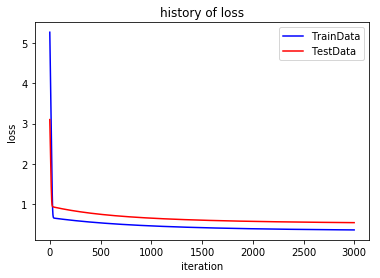

In [12]:
plt.plot(slr.loss, color="blue", label="TrainData")
plt.plot(slr.val_loss, color="red", label="TestData")
plt.title("history of loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()

plt.show()

## 【問題8】決定領域の可視化
決定領域を可視化してください。

In [13]:
iris_virgicolor = iris_data[iris_data["species"] == 1]
iris_virginica = iris_data[iris_data["species"] == 2]

In [14]:
X_train_plot = X_train[:, [0, 2]]
X_test_plot = X_test[:,[0, 2]]

In [15]:
slr_plot = ScratchLogisticRegression(num_iter=3000, lr=0.01)

In [16]:
slr_plot.fit(X_train_plot, y_train)

In [17]:
xrange = np.arange(4, 9, 0.1)
by = -(slr_plot.theta[0] + slr_plot.theta[1] * xrange) / slr_plot.theta[2]

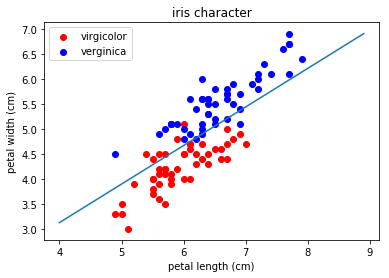

In [18]:
plt.scatter(iris_virgicolor["sepal length (cm)"], iris_virgicolor["petal length (cm)"], c="red", label="virgicolor")
plt.scatter(iris_virginica["sepal length (cm)"], iris_virginica["petal length (cm)"], c="blue", label="verginica")
plt.plot(xrange, by)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.title("iris character")
plt.legend()
plt.show()